
# 서울시 구별 CCTV 현황 분석하기

- 분석 개요
    - 서울시 각 구별 CCTV수를 파악하고, 인구대비 CCTV 비율을 파악해서 순위 비교
    - 인구 대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인
- 학습 개요
    - Jupyter Notebook 사용환경을 익히고 Python 기본 문법을 확인
    - Pandas와 Matplotlib의 기본적 사용법을 확인
    - 단순한 그래프 표현에서 한 단계 더 나아가 경향을 확인하고 시각화하는 기초 확인
- [Pandas](https://namu.wiki/w/pandas) 소개
    - 데이터 분석 및 조작을 위한 소프트웨어 라이브러리
    - 3조항 BSD 라이선스 조건(저작권자 관련 광고 금지) 하에서 무료로 사용 가능
    - 판다스의 이름은 계량 경제학에서 사용되는 용어인 'PANel DAta'의 앞 글자를 따서 지어졌음(실제 동물인 판다와는 아무런 관련이 없음)
    - R의 data.frame 구조를 본뜬 DataFrame 구조를 사용
    - 데이터 분석을 파이썬으로 입문하는 사람들의 필수적 라이브러리
    - [Pandas 기본 사용법 익히기, DANDYRILLA, 170812](https://dandyrilla.github.io/2017-08-12/pandas-10min/)
    - [판다스 공식 사이트](https://pandas.pydata.org/)
    - [scipy.org](https://docs.scipy.org/doc/)
- [Matplotlib](https://datascienceschool.net/view-notebook/d0b1637803754bb083b5722c9f2209d0/) 소개
    - 파이썬에서 자료를 차트(chart)나 플롯(plot)으로 시각화(visulaization)하는 패키지
    - [갤러리](https://matplotlib.org/gallery.html)
    - 차트 유형
        - 라인 플롯(line plot)
        - 스캐터 플롯(scatter plot)
        - 컨투어 플롯(contour plot)
        - 서피스 플롯(surface plot)
        - 바 차트(bar chart)
        - 히스토그램(histogram)
        - 박스 플롯(box plot)
    - [matplotlib.org](https://matplotlib.org/)
    
#### 원 저자 : [PinkWink](http://pinkwink.kr) 


## 0. 웹에서 자료 구하기

- 서울시 CCTV 현황
    - '서울시 자치구 연도별 CCTV 설치 현황' 구글링
    - https://data.seoul.go.kr/dataList/OA-2734/C/1/datasetView.do
    - 과거에는 csv 파일로 제공되었으나, 현재는 xlsx 파일로 제공됨
    - 수업에서는 [csv 파일](../data/01. CCTV_in_Seoul.csv)로 진행함
- 서울시 인구 현황
    - '서울시 서울통계' 구글링
    - https://data.seoul.go.kr/dataService/boardList.do#submenu99
    - 다양한 서울시 인구 자료 제공됨
    - 다양한 파일 형식으로 제공됨
    - 수업에서는 [xls 파일](../data/01. population_in_Seoul.xls)로 진행함 

## 1. 서울시 CCTV 자료 - csv 파일 읽기

In [1]:
# # 패키지 설치 (노트북 셀에서 실행하려면 명령 앞에 '!' 문자를 붙여줌)
# !conda install pandas
# !conda install numpy
# !conda install matplotlib
# !conda install xlrd
# 우리는 쥬피터 랩 시작하기 전에 이미 설치했지만, 이런 식으로 노트북 셀에서 직접 설치할 수도 있으니 참고하기 바람

In [152]:
import pandas as pd

In [153]:
# read_csv(): csv 파일 읽기
CCTV_Seoul = pd.read_csv('../data/01. CCTV_in_Seoul.csv',  encoding='utf-8')
# head(): 자료의 앞 부분만 검토하는 용도 
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [4]:
CCTV_Seoul.columns  # 열 정보 확인하면 Index(리스트) 형태임

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [5]:
CCTV_Seoul.columns[0]  # 0번 열 확인

'기관명'

In [6]:
# 열 이름 변경 
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)  # inplace 옵션으로 읽어들인 자료를 직접 수정 지시
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


## 2. 서울시 인구 자료- 엑셀 xls 파일 읽기

- [Pandas API reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)
- xlsx 파일도 xls 파일과 동일한 방식으로 read_excel() 처리 가능함

In [7]:
# read_excel(): xls 파일 읽기
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls',  encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [8]:
# 옵션 변경하여 다시 읽기
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls', 
                          header = 2,                 # (0부터 시작하는 번호 기준으로 )2번 행을 헤더로 지정
                          usecols = 'B, D, G, J, N',  # 지정 열만 읽어들이도록 제한 (과거에는 parse_cols )
                          encoding='utf-8')           # 인코딩 방식 지정
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [9]:
# 열 이름 변경
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별', 
                          pop_Seoul.columns[1] : '인구수', 
                          pop_Seoul.columns[2] : '한국인', 
                          pop_Seoul.columns[3] : '외국인', 
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


# 3. Pandas 기초

- Numpy
    - 고성능의 수치계산을 위해, C 언어로 구현된 파이썬 라이브러리
    - Numerical Python의 줄임말
    - 벡터 및 행렬 연산의 매우 편리한 기능을 제공
    - 데이터 분석 라이브러리인 pandas 및 matplotlib의 기반으로 사용됨
    - 기본적으로 array(행렬) 단위로 데이터를 관리
    - [Numpy Reference](https://docs.scipy.org/doc/numpy-1.15.1/reference/)

In [10]:
import pandas as pd
import numpy as np

In [11]:
# Series(): (인덱스 즉, 축 라벨 지정하여) 일차원 배열 생성
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [12]:
# date_range(): 주기를 지정하여 DatetimeIndex(리스트) 생성, 
# 기본값으로 freq(주기)는 'D'(일 단위)로 지정되어서 기간(periods)이 6이므로, 총 6일 분량을 생성
# periods=6, freq='5H'로 지정하면 5시간 주기로 6회, 총 30시간 분량을 지정한다는 의미 
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [13]:
# DataFrame(): 2차원 표 생성, 사이즈 변경 가능하고, 혼합형 데이터 저장 가능함
df = pd.DataFrame(
            np.random.randn(6, 4),      # 표준정규분포 난수 생성 (6행, 4열)
            index=dates,                # (행) 인덱스를 지정
            columns=['A','B','C','D'])  # 열 (인덱스)를 지정
df                                      # 셀 실행할 때마다 다른 값이 출력됨

,A,B,C,D
2013-01-01,-0.170613,1.187204,-0.556378,0.325837
2013-01-02,-0.587527,1.391363,-0.441917,-0.602940
2013-01-03,0.426106,0.692303,0.620178,-0.707810
2013-01-04,0.450823,0.224962,0.055724,-1.606615
2013-01-05,2.433134,0.506439,1.352132,-0.519230
2013-01-06,-0.199360,-1.236590,-1.207814,0.003779


In [14]:
df.head()

,A,B,C,D
2013-01-01,-0.170613,1.187204,-0.556378,0.325837
2013-01-02,-0.587527,1.391363,-0.441917,-0.602940
2013-01-03,0.426106,0.692303,0.620178,-0.707810
2013-01-04,0.450823,0.224962,0.055724,-1.606615
2013-01-05,2.433134,0.506439,1.352132,-0.519230


In [15]:
df.head(3)

,A,B,C,D
2013-01-01,-0.170613,1.187204,-0.556378,0.325837
2013-01-02,-0.587527,1.391363,-0.441917,-0.602940
2013-01-03,0.426106,0.692303,0.620178,-0.707810


In [16]:
df.index  # (행) 인덱스 확인

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [17]:
df.columns  # 열 (인덱스) 확인

Index(['A', 'B', 'C', 'D'], dtype='object')

In [18]:
df.values  # 표 내부 값 확인, 배열(행_리스트의_리스트)

array([[-0.17061298,  1.18720441, -0.55637819,  0.32583733],
       [-0.58752707,  1.39136265, -0.44191685, -0.60294046],
       [ 0.4261063 ,  0.6923032 ,  0.62017769, -0.70780972],
       [ 0.45082257,  0.22496249,  0.05572368, -1.60661538],
       [ 2.43313434,  0.50643947,  1.3521317 , -0.51923024],
       [-0.19935977, -1.23658973, -1.20781398,  0.00377929]])

In [19]:
df.info()  # 표 개요 정보 확인

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [20]:
df.describe()  # 표 기술 통계량 확인

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.392094,0.460947,-0.029679,-0.517830
std,1.076714,0.936594,0.913714,0.665228
min,-0.587527,-1.236590,-1.207814,-1.606615
25%,-0.192173,0.295332,-0.527763,-0.681592
50%,0.127747,0.599371,-0.193097,-0.561085
75%,0.444643,1.063479,0.479064,-0.126973
max,2.433134,1.391363,1.352132,0.325837


In [21]:
df.sort_values(by='B',            # 정렬 기준 열 
               ascending=False)  # 내림차순

,A,B,C,D
2013-01-02,-0.587527,1.391363,-0.441917,-0.602940
2013-01-01,-0.170613,1.187204,-0.556378,0.325837
2013-01-03,0.426106,0.692303,0.620178,-0.707810
2013-01-05,2.433134,0.506439,1.352132,-0.519230
2013-01-04,0.450823,0.224962,0.055724,-1.606615
2013-01-06,-0.199360,-1.236590,-1.207814,0.003779


In [22]:
df

,A,B,C,D
2013-01-01,-0.170613,1.187204,-0.556378,0.325837
2013-01-02,-0.587527,1.391363,-0.441917,-0.602940
2013-01-03,0.426106,0.692303,0.620178,-0.707810
2013-01-04,0.450823,0.224962,0.055724,-1.606615
2013-01-05,2.433134,0.506439,1.352132,-0.519230
2013-01-06,-0.199360,-1.236590,-1.207814,0.003779


In [23]:
df['A']  # 특정 열만 지정
# 표에서 특정 열만 확인해도, (행) 인덱스 정보를 함께 출력해줌
# 출력 마지막에서 Freq는 주기(frequency)를 의미하며 11번 셀에서 일 단위(D)로 지정되었다는 의미

2013-01-01   -0.170613
2013-01-02   -0.587527
2013-01-03    0.426106
2013-01-04    0.450823
2013-01-05    2.433134
2013-01-06   -0.199360
Freq: D, Name: A, dtype: float64

In [24]:
df[0:3]  # 특정 행만 지정

,A,B,C,D
2013-01-01,-0.170613,1.187204,-0.556378,0.325837
2013-01-02,-0.587527,1.391363,-0.441917,-0.602940
2013-01-03,0.426106,0.692303,0.620178,-0.707810


In [25]:
df['20130102':'20130104']  # 행 지정을 날짜 값 형식으로도 가능함

,A,B,C,D
2013-01-02,-0.587527,1.391363,-0.441917,-0.602940
2013-01-03,0.426106,0.692303,0.620178,-0.707810
2013-01-04,0.450823,0.224962,0.055724,-1.606615


#### pandas.DataFrame.loc[] 
    - loc()가 아니라. loc[] !!!
    - 표에서 접근하고 싶은 위치(location)를 행 및 열의 라벨(label)로 지정

In [26]:
df.loc['20130103']  # (행) 인덱스 값만으로 접근 

A    0.426106
B    0.692303
C    0.620178
D   -0.707810
Name: 2013-01-03 00:00:00, dtype: float64

In [27]:
df.loc[dates[0]]  # (행) 인덱스 값만으로 접근 

A   -0.170613
B    1.187204
C   -0.556378
D    0.325837
Name: 2013-01-01 00:00:00, dtype: float64

In [28]:
df.loc['20130103','B']  # (행) 인덱스 및 열 (인덱스) 값으로 접근 

0.6923032013104767

In [29]:
df.loc['20130103':'20130105']  # (행) 인덱스 범위로 접근

,A,B,C,D
2013-01-03,0.426106,0.692303,0.620178,-0.707810
2013-01-04,0.450823,0.224962,0.055724,-1.606615
2013-01-05,2.433134,0.506439,1.352132,-0.519230


In [30]:
df.loc[dates[2]:dates[4]]  # (행) 인덱스 범위로 접근

,A,B,C,D
2013-01-03,0.426106,0.692303,0.620178,-0.707810
2013-01-04,0.450823,0.224962,0.055724,-1.606615
2013-01-05,2.433134,0.506439,1.352132,-0.519230


In [31]:
# df.loc['20130103', '20130105'] # 오류, 다수 (행) 인덱스로 접근
# df.loc[['20130103', '20130105']] # 오류, 다수 (행) 인덱스로 접근
# df.loc[[dates[2], dates[4]]]     # 오류, 다수 (행) 인덱스로 접근
# df.loc[[dates[2], dates[4]]]     # 오류, 다수 (행) 인덱스로 접근

In [32]:
df.loc[dates[2]:dates[4], 'B':'C']  # (행) 인덱스 및 열 (인덱스) 범위로 접근

,B,C
2013-01-03,0.692303,0.620178
2013-01-04,0.224962,0.055724
2013-01-05,0.506439,1.352132


In [33]:
df.loc[:,['A','C']]  # (행) 전체, 특정 다수 열

,A,C
2013-01-01,-0.170613,-0.556378
2013-01-02,-0.587527,-0.441917
2013-01-03,0.426106,0.620178
2013-01-04,0.450823,0.055724
2013-01-05,2.433134,1.352132
2013-01-06,-0.199360,-1.207814


In [34]:
# df.loc[['20130103', '20130105'],['A','C']]  # 오류, 특정 다수 (행), 특정 다수 열
df.loc[[dates[2], dates[4]],['A','C']]        # 성공, 특정 다수 (행), 특정 다수 열

,A,C
2013-01-03,0.426106,0.620178
2013-01-05,2.433134,1.352132


In [35]:
df.loc['20130102':'20130104',['A','C']]

,A,C
2013-01-02,-0.587527,-0.441917
2013-01-03,0.426106,0.620178
2013-01-04,0.450823,0.055724


In [36]:
df.loc['20130102',['A','C']]

A   -0.587527
C   -0.441917
Name: 2013-01-02 00:00:00, dtype: float64

In [37]:
df.loc[dates[0],'A']

-0.17061298391769408

In [38]:
df.iloc[3]

A    0.450823
B    0.224962
C    0.055724
D   -1.606615
Name: 2013-01-04 00:00:00, dtype: float64

In [39]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.450823,0.224962
2013-01-05,2.433134,0.506439


In [40]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.587527,-0.441917
2013-01-03,0.426106,0.620178
2013-01-05,2.433134,1.352132


In [41]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.587527,1.391363,-0.441917,-0.60294
2013-01-03,0.426106,0.692303,0.620178,-0.70781


In [42]:
df.iloc[:,1:3]

,B,C
2013-01-01,1.187204,-0.556378
2013-01-02,1.391363,-0.441917
2013-01-03,0.692303,0.620178
2013-01-04,0.224962,0.055724
2013-01-05,0.506439,1.352132
2013-01-06,-1.236590,-1.207814


In [43]:
df

,A,B,C,D
2013-01-01,-0.170613,1.187204,-0.556378,0.325837
2013-01-02,-0.587527,1.391363,-0.441917,-0.602940
2013-01-03,0.426106,0.692303,0.620178,-0.707810
2013-01-04,0.450823,0.224962,0.055724,-1.606615
2013-01-05,2.433134,0.506439,1.352132,-0.519230
2013-01-06,-0.199360,-1.236590,-1.207814,0.003779


In [44]:
df[df.A > 0]

,A,B,C,D
2013-01-03,0.426106,0.692303,0.620178,-0.707810
2013-01-04,0.450823,0.224962,0.055724,-1.606615
2013-01-05,2.433134,0.506439,1.352132,-0.519230


In [45]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,1.187204,NaN,0.325837
2013-01-02,NaN,1.391363,NaN,NaN
2013-01-03,0.426106,0.692303,0.620178,NaN
2013-01-04,0.450823,0.224962,0.055724,NaN
2013-01-05,2.433134,0.506439,1.352132,NaN
2013-01-06,NaN,NaN,NaN,0.003779


In [46]:
df2 = df.copy()

In [47]:
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-0.170613,1.187204,-0.556378,0.325837,one
2013-01-02,-0.587527,1.391363,-0.441917,-0.602940,one
2013-01-03,0.426106,0.692303,0.620178,-0.707810,two
2013-01-04,0.450823,0.224962,0.055724,-1.606615,three
2013-01-05,2.433134,0.506439,1.352132,-0.519230,four
2013-01-06,-0.199360,-1.236590,-1.207814,0.003779,three


In [48]:
df2['E'].isin(['two','four'])  # 프레임.isin(리스트): 프레임 값이 리스트에 해당하면 True

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [49]:
df2[ df2['E'].isin(['two','four']) ]

,A,B,C,D,E
2013-01-03,0.426106,0.692303,0.620178,-0.70781,two
2013-01-05,2.433134,0.506439,1.352132,-0.51923,four


In [50]:
df

,A,B,C,D
2013-01-01,-0.170613,1.187204,-0.556378,0.325837
2013-01-02,-0.587527,1.391363,-0.441917,-0.602940
2013-01-03,0.426106,0.692303,0.620178,-0.707810
2013-01-04,0.450823,0.224962,0.055724,-1.606615
2013-01-05,2.433134,0.506439,1.352132,-0.519230
2013-01-06,-0.199360,-1.236590,-1.207814,0.003779


In [51]:
df.apply(np.cumsum)  # numpy.cumsum 누적합계

,A,B,C,D
2013-01-01,-0.170613,1.187204,-0.556378,0.325837
2013-01-02,-0.758140,2.578567,-0.998295,-0.277103
2013-01-03,-0.332034,3.270870,-0.378117,-0.984913
2013-01-04,0.118789,3.495833,-0.322394,-2.591528
2013-01-05,2.551923,4.002272,1.029738,-3.110758
2013-01-06,2.352563,2.765682,-0.178076,-3.106979


In [52]:
df.apply(lambda x: x.max() - x.min())

A    3.020661
B    2.627952
C    2.559946
D    1.932453
dtype: float64

# 4. CCTV 데이터 파악하기

In [53]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [54]:
# 소계 하위 5개 구
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [55]:
# 소계 상위 5개 구
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [56]:
# 최근 3개년도 증가율 상위 5개 구
CCTV_Seoul['최근증가율'] = (
                             CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']
                           ) / CCTV_Seoul['2013년도 이전']  * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


# 5. 서울시 인구 데이터 파악하기

In [57]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [58]:
# 합계 행 삭제
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [59]:
# '구별' 열 값을 중복없이 출력하니, nan 값이 존재함
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [60]:
# isnull()로 nan 값 확인하니, 행 번호가 26
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [61]:
# drop([26]으로 26번 행 삭제
pop_Seoul.drop([26], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [62]:
# '외국인비율' 및 '고령자비율' 열 계산 및 추가
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [63]:
# '인구수' 열 상위 5개 구 확인
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [64]:
# '외국인' 열 상위 5개 구 확인
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [65]:
# '외국인비율' 상위 5개 구 확인
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [66]:
# '고령자' 열 상위 5개 구 확인
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [67]:
# '고령자비율' 열 상위 5개 구 확인
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


# 6. Pandas 고급 두 DataFrame 병합하기

### 1) pandas.concat
- 판다스 객체를 특정 축 방향으로 병합(concatenate)

In [68]:
# 0~3 행, 'A'~'D' 열
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

# 4~7 행, 'A'~'D' 열
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

# 8~11 행, 'A'~'D' 열
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [69]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [70]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [71]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [72]:
# concat([df1, df2, ..., dfn])로 수직 병합 (기본값 axis=0 생략한 경우) 
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [73]:
# concat([df1, df2, ..., dfn)로 수직 병합하되, 상위 수준 키 부여
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [74]:
# 수직 병합된 행 인덱스 확인 
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [75]:
# 수직 병합된 행 인덱스에서 get_level_values(0) 
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [76]:
# 수직 병합된 행 인덱스에서 get_level_values(1) 
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [77]:
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [78]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

In [79]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [80]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [81]:
# 행/열 값이 일부 겹치는 df (수평) 병합 
# 병합 축      방향으로는 단순 병합(중복 열 겹침 처리 없음), 
# 병합 축 아닌 방향으로는 겹침 병합(중복 행 겹침 처리) 
result = pd.concat([df1, df4], axis=1)
result  # 열 축으로는 추가 병합, 인덱스 축으로는 겹침 병함
# axis 옵션(0 또는 생략하면 수직 방향(인덱스 축), 1이면 수평 방향(열 축))으로 병합

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [82]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [83]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [84]:
# 행/열 값이 일부 겹치는 df (수직) 병합 
# 병합 축      방향으로는 단순 병합(중복 행 겹침 처리 없음), 
# 병합 축 아닌 방향으로는 겹침 병합(중복 열 겹침 처리) 
result = pd.concat([df1, df4], sort=False)
result
# sort: 비 병합 축으로 정렬 여부를 지정하는 옵션
#       join='outer'일 때만 의미가 있음
#       join='inner'일 때는 정렬되도록 겹침 병합하므로

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [85]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [86]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [87]:
# join='inner|outer' 옵션으로 병합
# 'inner' join 옵션 지정하면, 비 병합 축 방향으로 겹치는 행 또는 열만 (정렬 상태로) 병합 
result = pd.concat([df1, df4], join='inner')
result

,B,D
0,B0,D0
1,B1,D1
2,B2,D2
3,B3,D3
2,B2,D2
3,B3,D3
6,B6,D6
7,B7,D7


In [88]:
# join='inner|outer' 옵션으로 병합
# 'inner' join 옵션 지정하면, 비 병합 축 방향으로 겹치는 행 또는 열만 (정렬 상태로) 병합
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [89]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [90]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [91]:
# 수평 병합 후, reindex(), reindex에서 지정한 행만 병합  
result = pd.concat([df1, df4], axis=1).reindex(df1.index)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


### 2) pandas.DataFrame.merge
- DB join 형식으로 df를 결합(merge)

In [92]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],  # 'key' 열 지정
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],  # 'key' 열 지정
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [93]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [94]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [95]:
pd.merge(left, right, on='key')  # how='inner' 생략한 형태, DB의 'inner join'과 유사
# 양쪽에 모두 존재하는 K0, K2, K3

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [96]:
pd.merge(left, right, how='inner', on='key')  # how='inner' 먕시한 형태, DB의 'inner join'과 유사

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [97]:
pd.merge(left, right, how='left', on='key')  # DB의 'left outer join'과 유사 
# 양쪽에 모두 존재하는 (K0, K2, K3)와 왼쪽에만 존재하는 K4까지 포함

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [98]:
pd.merge(left, right, how='right', on='key')  # DB의 'right outer join'과 유사
# 양쪽에 모두 존재하는 (K0, K2, K3)와 오른쪽에만 존재하는 K1까지 포함

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3
3,K1,NaN,NaN,C1,D1


In [99]:
pd.merge(left, right, how='outer', on='key')  # how='outer' 
# 양쪽에 모두 존재하는 (K0, K2, K3)와 
# 왼쪽에만 존재하는 K4와 
# 오른쪽에만 존재하는 K1까지 
# 모두 포함

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


# 7. CCTV 데이터와 인구 데이터 합쳐서 분석하기

In [100]:
CCTV_Seoul.head()  # CCTV 데이터

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [101]:
pop_Seoul.head()  # 인구 데이터

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [102]:
# '구별' 열을 key 열로 활용하여 merge 
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [103]:
# 연도별 CCTV 데이터 열을 삭제
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()
# 행 삭제는 drop, 열 삭제는 del

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [104]:
# '구별' 열을 인덱스로 설정 (행 번호 열이 사라짐)
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


- (고령자비율, 외국인비율, 인구수) 중에서 CCTV 소계와 관련성이 큰 항목은?
- 상관계수(correlation coefficient)
    - 상관계수 절대값이 클수록 강한 상관관계
        - 상관계수 절대값이 0.1 이하: 거의 무관함
        - 상관계수 절대값이 0.3 이하: 약한 상관관계
        - 상관계수 절대값이 0.7 이하: 뚜렷한 상관관계
    - numpy.corrcoef()
        - 결과값을 행렬로 산출
        - 주 대각선을 기준으로 대칭인 행렬
        - 주 대각선 이외의 값에 주목
    - 상관관계 해석
        - 고령자비율 대 소계는 약한 음의 상관관계
        - 외국인비율 대 소계는 거의 무관
        - 인구수 대 소계는 약한 양의 상관관계

In [105]:
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [106]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [107]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

- 인구수와 CCTV 소계의 관계에 집중해서 분석

In [108]:
# 소계 역순으로 정렬
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [109]:
# 인구수 역순으로 정렬
data_result.sort_values(by='인구수', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


# 8. 그래프 그리기 기초 - matplotlib

- matplotlib.pyplot: 차트 그리기

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline  
# 그래프 출력을 출력 세션으로 지정  

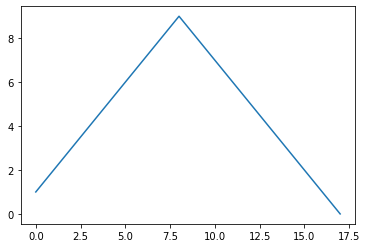

In [111]:
plt.figure()                                                       # 새 그림을 생성
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0])   # 단일 리스트이므로, y 값으로 해석, x 값은 자동 생성
plt.show()  # 그림 출력                                            # y 값 리스트 원소가 18개이므로, x 값 리스트는 [0, 1, ..., 17]

In [112]:
import numpy as np
t = np.arange(0, 12, 0.01)  # numpy.arange(시작값, 종료값, 증분) 
y = np.sin(t)               # 사인 함수

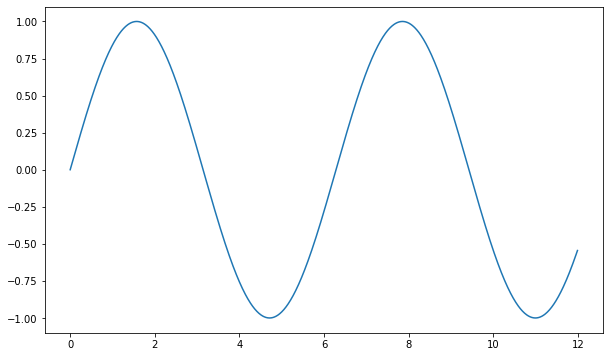

In [113]:
plt.figure(figsize=(10, 6))  # figsize(너비, 높이) 인치 단위
plt.plot(t, y)
plt.show()

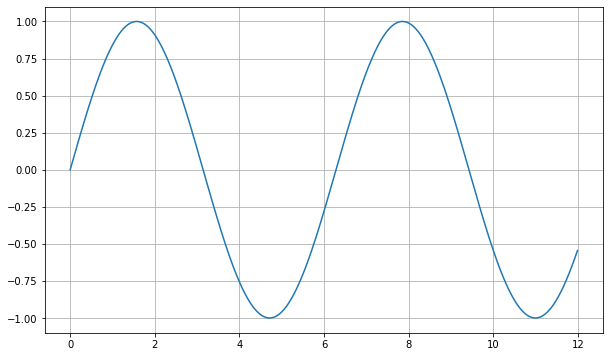

In [114]:
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.grid()                  # 그리드 적용
plt.show()

- [Matplotlib에서 한글 폰트 사용하기](https://programmers.co.kr/learn/courses/21/lessons/950)

In [115]:
import platform

# rc(runtime configuration)를 사전 형태로 저장한 rcParams
from matplotlib import font_manager, rc  
# '-' 표시를 unicode minus 문자(True)로 할지, 아니면 ASCII hyphen 문자(False)로 할지 
plt.rcParams['axes.unicode_minus'] = False  

if platform.system() == 'Darwin':        # MAC OS X
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':     # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

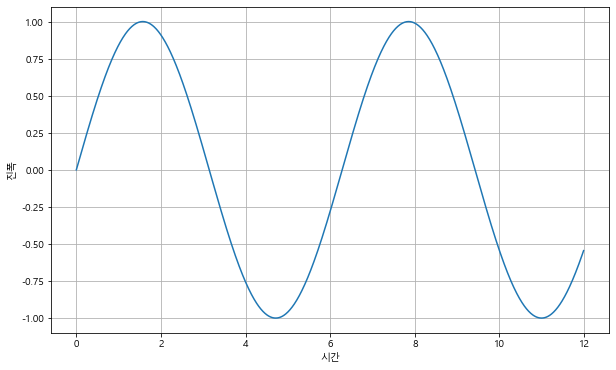

In [116]:
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.grid()
plt.xlabel('시간')       # x축 라벨
plt.ylabel('진폭')       # y축 라벨
plt.show()

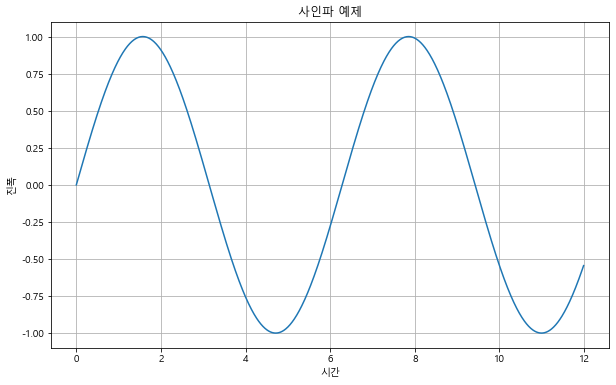

In [117]:
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.grid()
plt.xlabel('시간')
plt.ylabel('진폭')
plt.title('사인파 예제')  # 차트 제목
plt.show()

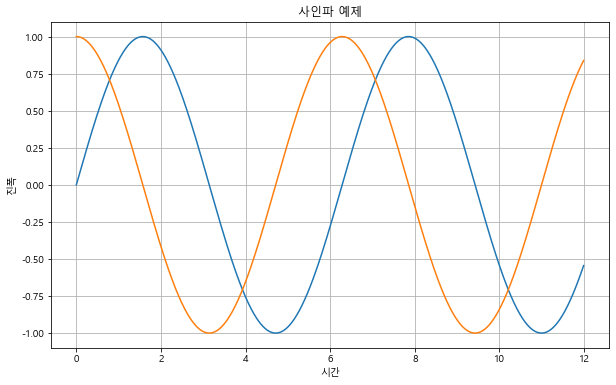

In [118]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t))  # 사인(파란색)
plt.plot(t, np.cos(t))  # 코사인(주황색)
plt.grid()
plt.xlabel('시간')
plt.ylabel('진폭')
plt.title('사인파 예제')
plt.show()

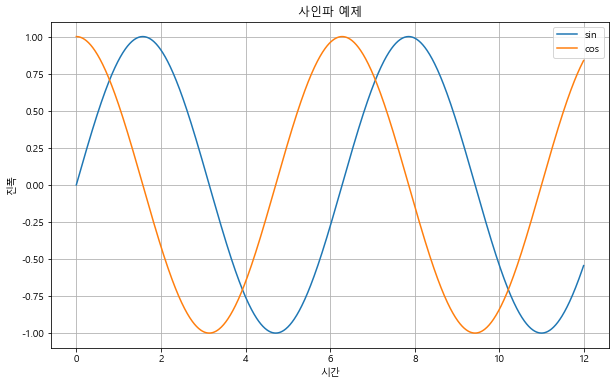

In [119]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), label='sin')  # label
plt.plot(t, np.cos(t), label='cos')  # label
plt.grid()
plt.legend()                         # 범례
plt.xlabel('시간')
plt.ylabel('진폭')
plt.title('사인파 예제')
plt.show()

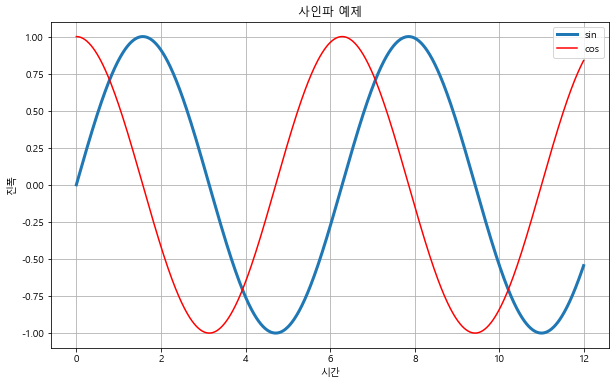

In [120]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), linewidth=3, label='sin')  # linewidth
plt.plot(t, np.cos(t), 'r', label='cos')          # 'r' red
plt.grid()
plt.legend()
plt.xlabel('시간')
plt.ylabel('진폭')
plt.title('사인파 예제')
plt.show()

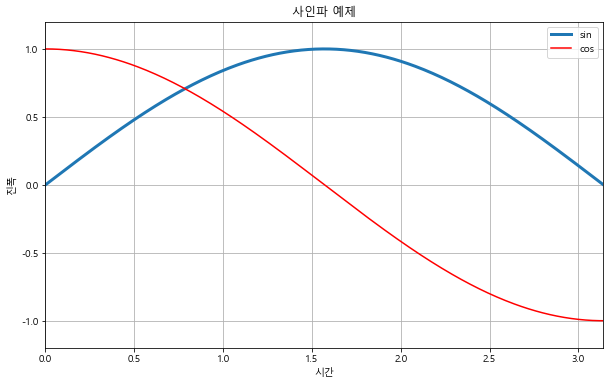

In [121]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t), linewidth=3, label='sin')  
plt.plot(t, np.cos(t), 'r', label='cos')          
plt.grid()
plt.legend()
plt.xlabel('시간')
plt.ylabel('진폭')
plt.title('사인파 예제')
plt.ylim(-1.2, 1.2)         # y 축 범위
plt.xlim(0, np.pi)          # x 축 범위, np.pi 원주율 phi = 3.14
plt.show()

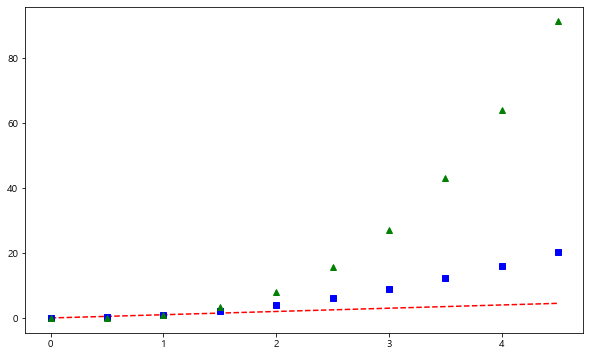

In [122]:
t = np.arange(0, 5, 0.5)

plt.figure(figsize=(10, 6))
plt.plot(t, t, 'r--')        # 'r'  red                               '--' dashed line style
plt.plot(t, t**2, 'bs')      # 'b'  blue markers with default shape, 's'   square marker
plt.plot(t, t**3, 'g^')      # 'g'  green,                           '^'   triangle_up marker
plt.show()

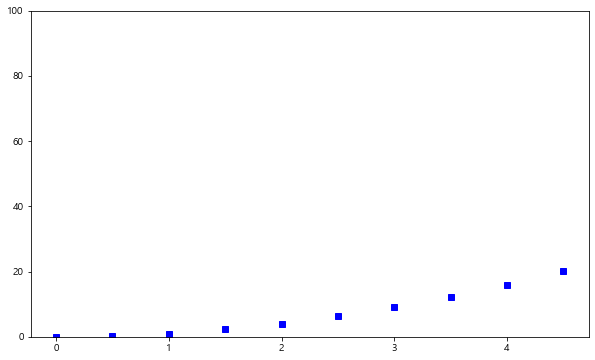

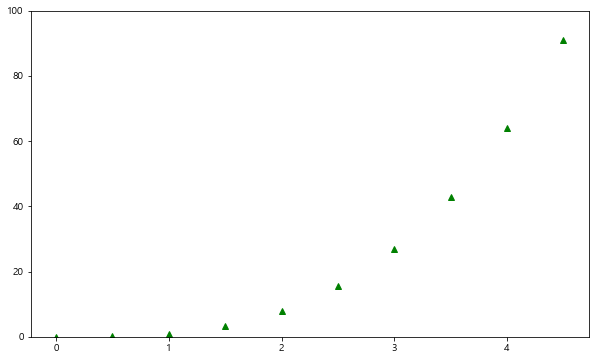

In [123]:
t = np.arange(0, 5, 0.5)

plt.figure(figsize=(10, 6))    # 새 그림 생성
plt.ylim(0, 100)
pl1 = plt.plot(t, t**2, 'bs')

plt.figure(figsize=(10, 6))    # 새 그림 생성
plt.ylim(0, 100)
pl2 = plt.plot(t, t**3, 'g^')

plt.show()                     # 그림 출력 (두 그림의 y 축 범위를 통일해야!)

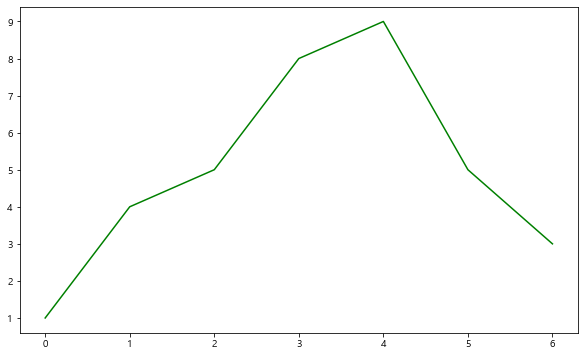

In [124]:
t = [0, 1, 2, 3, 4, 5, 6] 
y = [1, 4, 5, 8, 9, 5, 3]

plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green')
plt.show()

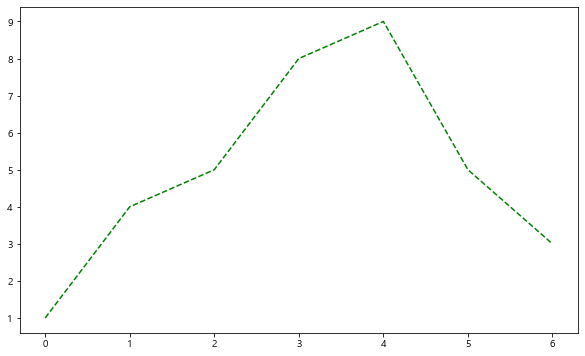

In [125]:
plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green', linestyle='dashed')
plt.show()

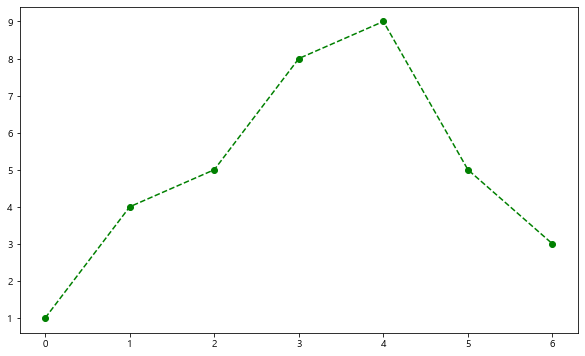

In [126]:
plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o')
plt.show()

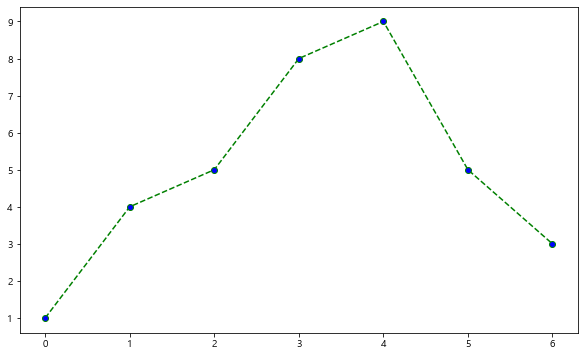

In [127]:
plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue')
plt.show()

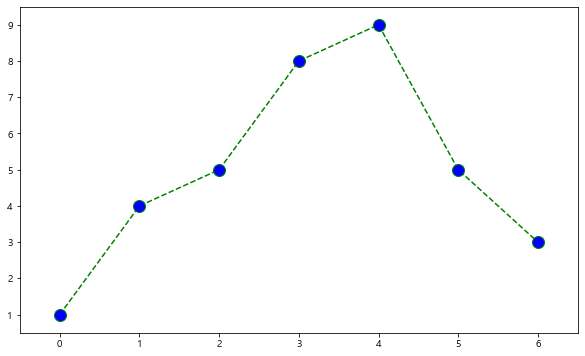

In [128]:
plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue', markersize=12)

plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])
plt.show()

In [129]:
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([9, 8, 7, 9, 8, 3, 2, 4, 3, 4])

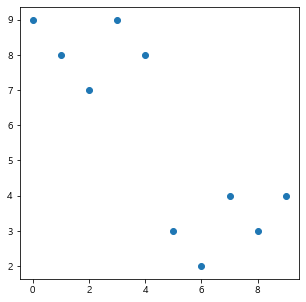

In [130]:
plt.figure(figsize=(5, 5))
plt.scatter(t,y)            # 산점도
plt.show()

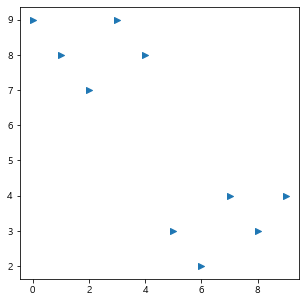

In [131]:
plt.figure(figsize=(5, 5))
plt.scatter(t, y, marker='>')
plt.show()

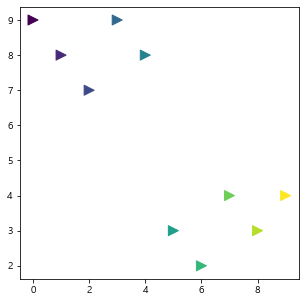

In [132]:
colormap = t    # x 축 값인 t에 따라서 색상을 변경하는 colormap

plt.figure(figsize=(5, 5))
plt.scatter(t, y, s=100, c=colormap, marker='>')  # s 옵션은 마커 크기
plt.show()

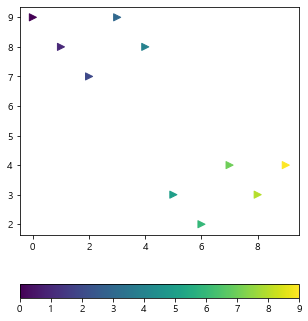

In [133]:
colormap = t                                          # t 값을 colormap으로 지정

plt.figure(figsize=(5, 6))
plt.scatter(t, y, s=50, c=colormap, marker='>')
plt.colorbar(orientation='horizontal')                # colorbar()
plt.show()

In [134]:
# numpy.random.normal(): 정규분포로부터 random sampling(무작위 표본 추출) 
# loc(평균),  scale(표준편차), size(표본 크기) 
s1 = np.random.normal(loc=0,  scale=1,   size=1000)  
s2 = np.random.normal(loc=5,  scale=0.5, size=1000)  
s3 = np.random.normal(loc=10, scale=2,   size=1000)  

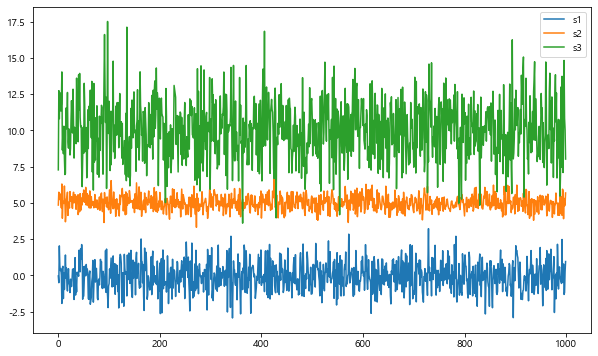

In [135]:
plt.figure(figsize=(10, 6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

- [boxplot](https://pinkwink.kr/973)

![](https://lh5.googleusercontent.com/proxy/0zmvRUkbXxQGCssXzWsyaJbf99yEs_hwPQXc6pX5AsWuNUd9njuOaY2BdMUKAjRHHUBYpuTEIfcYjyf8IoV7wAeK1DRD7BgxzhAyWvbRjYiIpdBBZQ4LxOYbUa5-eGxd3Hur7CCawd4lPcL1u-yCpcRF)    
![](https://support.minitab.com/ko-kr/minitab/19/media/generated-content/images/Marginal_plot_box_def.png)


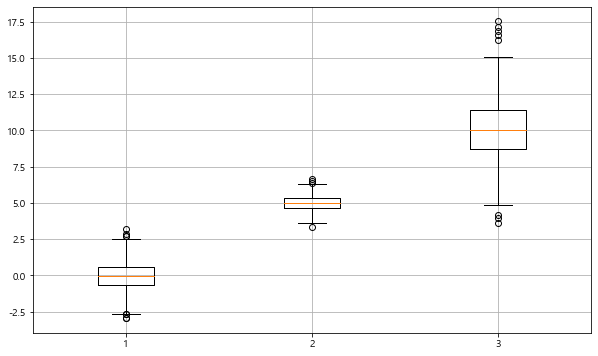

In [136]:
plt.figure(figsize=(10, 6))
plt.boxplot((s1, s2, s3))   # 박스 플롯
plt.grid()
plt.show()

- [subplot](https://pinkwink.kr/972)

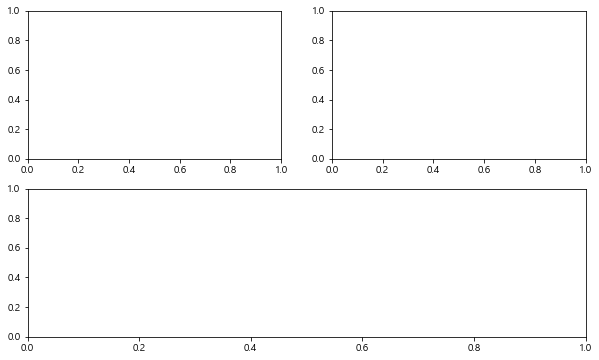

In [137]:
plt.figure(figsize=(10, 6))

plt.subplot(221)  # 2 x 2 에서 1번 위치
plt.subplot(222)  # 2 x 2 에서 2번 위치
plt.subplot(212)  # 2 x 1 에서 1번 위치

plt.show()

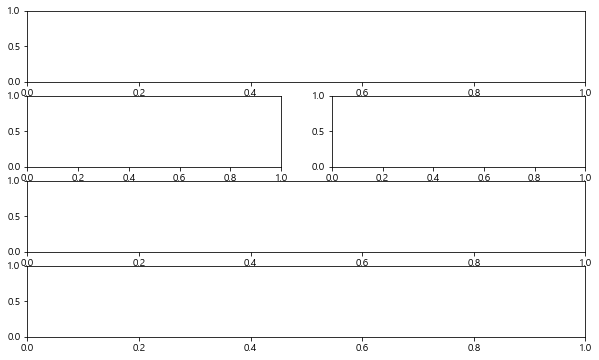

In [138]:
plt.figure(figsize=(10, 6))

plt.subplot(411)  # 4 x 1 에서 1번 위치
plt.subplot(423)  # 4 x 2 에서 3번 위치
plt.subplot(424)  # 4 x 2 에서 4번 위치
plt.subplot(413)  # 4 x 1 에서 3번 위치
plt.subplot(414)  # 4 x 1 에서 4번 위치

plt.show()

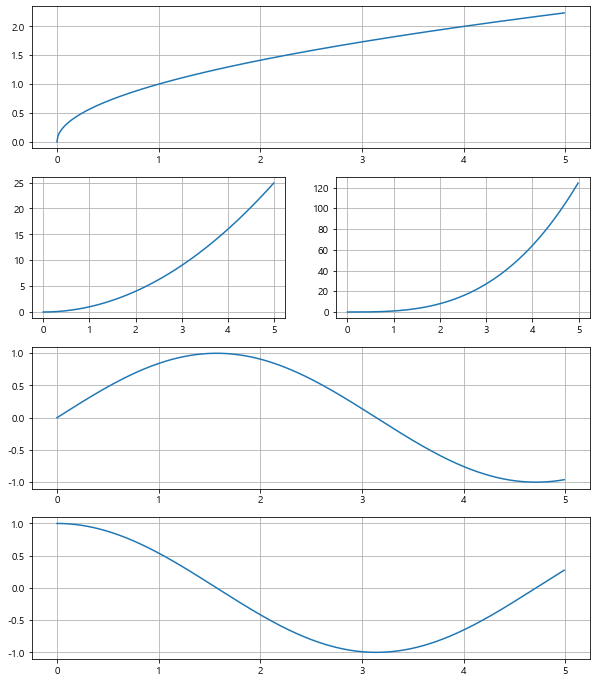

In [139]:
t = np.arange(0, 5, 0.01)

plt.figure(figsize=(10, 12))

plt.subplot(411)
plt.plot(t,np.sqrt(t))
plt.grid()

plt.subplot(423)
plt.plot(t,t**2)
plt.grid()

plt.subplot(424)
plt.plot(t,t**3)
plt.grid()

plt.subplot(413)
plt.plot(t,np.sin(t))
plt.grid()

plt.subplot(414)
plt.plot(t,np.cos(t))
plt.grid()

plt.show()

# 9. CCTV와 인구현황 그래프로 분석하기

In [140]:
data_result.head()  # 정리했던 데이터 확인

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


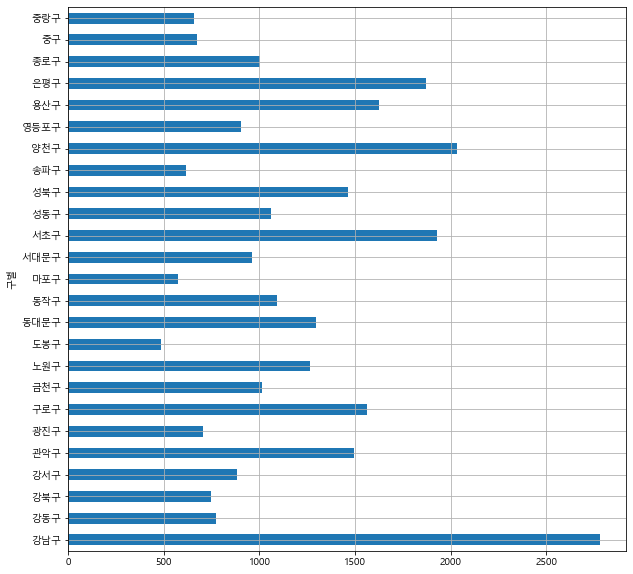

In [141]:
# CCTV 소계 수폄 막대 그래프 (not sorted)
plt.figure()
# 정리했던 데이터 뒤에 plot() 함수 적용하여 차트 작성
# 'barh': 수평 막대, 'bar': 수직 막대
data_result['소계'].plot(kind='barh', grid=True, figsize=(10, 10))
# plt.xlabel('CCTV 설치 수량(단위: 대)')
plt.show()

- 위 차트는 정렬되지 않은 상태라 해석이 어려움
- 축 제목 및 단위가 누락됨

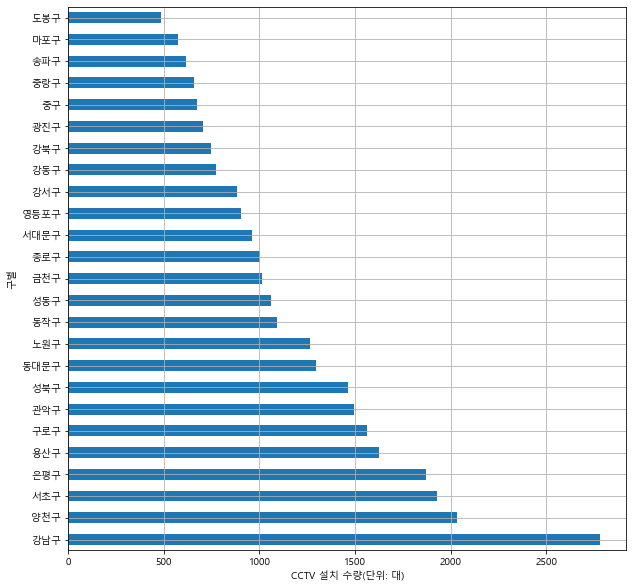

In [142]:
# CCTV 소계 정렬하여 수평 막대 그래프
data_result['소계'].sort_values(ascending=False).plot(kind='barh', 
                                     grid=True, figsize=(10, 10))
plt.xlabel('CCTV 설치 수량(단위: 대)')
plt.show()

- 정렬의 위력
    - 엄청난 강남
    - 만만하지 않은 양천, 서초, 은평
    - 하위권: 도봉, 마포, 송파
    - 강남구는 도봉구의 4배가 넘는다는...
- 오름차순 정렬?
- 인구 대비 분석의 필요성

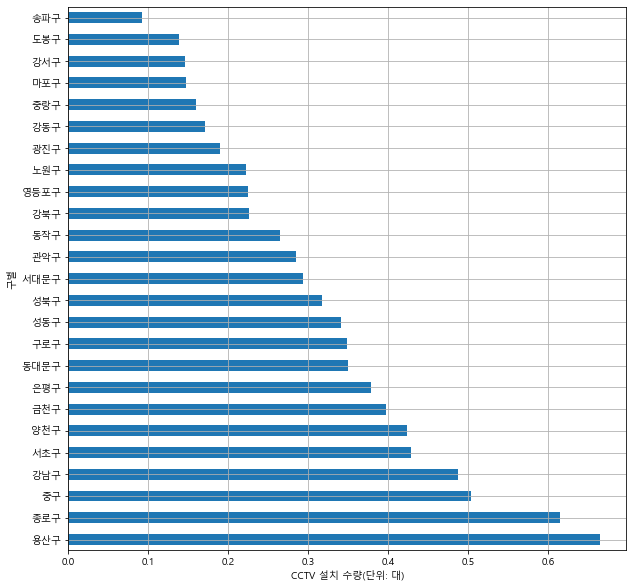

In [151]:
# 인구 대비 CCTV 비율
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

data_result['CCTV비율'].sort_values(ascending=False).plot(kind='barh', 
                                         grid=True, figsize=(10, 10))
plt.xlabel('CCTV 설치 수량(단위: 대)')
plt.show()

- 인구 대비 분석
    - 용산구 및 종로구가 압도적
    - 하위권: 송파, 도봉 (절대 수량 및 상대 수량 모두 하위권)
    - 하락: 강남구( 1위 -> 4위), 양천구(2위 -> 6위) 
    - 상승: 종로구(14위 -> 2위), 용산구(5위 -> 1위)
- 산점도(scatter diagram): matplot.pyplot.scatter()

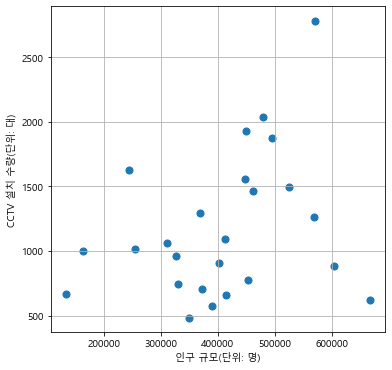

In [144]:
# 인구 대비 CCTV 설치 수량으로 산점도 
plt.figure(figsize=(6, 6))
plt.scatter(data_result['인구수'],  # x 좌표 
            data_result['소계'],   # y 좌표 
            s=50)                  # 점 크기
plt.xlabel('인구 규모(단위: 명)')
plt.ylabel('CCTV 설치 수량(단위: 대)')
plt.grid()
plt.show()

- 인구 규모와 CCTV 설치 수량 사이에 양의 상관관계가 존재한다고 했으므로 ...
- 다항식 최소제곱 근사법으로 직선형 추세선을 추정
    - https://darkpgmr.tistory.com/56
    - http://www.aistudy.com/math/least_atkinson.htm
    - 추세선: numpy.polyfit()
    - x 축: numpy.linspace()
    - y 축: numpy.poly1d()

In [145]:
# numpy.polyfit(x, y, 차수)
pf = np.polyfit(data_result['인구수'],  # 추정에 사용할 x 좌표 값
                data_result['소계'],    # 추정에 사용할 y 좌표 값
                1)                     # 1차원(직선 형태) 다항식
pf

array([1.30916415e-03, 6.45066497e+02])

- 위 추정 결과의 해석
    - 차수를 1로 지정했으므로, 1차 다항식 y = ax + b 형태로 추정
    - 추정 결과: array([a, b])
- 추정 결과의 적용
    - numpy.poly1d( array([a, b]) )로 다항식 클래스 ax +b 생성하여 y 값을 계산 

In [146]:
# y 축
fy = np.poly1d(pf)                    
fy

poly1d([1.30916415e-03, 6.45066497e+02])

- poly1d(pf)로 추정한 다항식은 poly1d([a, b]) = ax + b
- 지금까지 y 축 값에 대한 추정식을 찾았음
- 이제 x 축에 대한 값의 범위를 지정
    - numpy.linspace(시작값, 끝값(포함), 개수) 
    - linspace()는 선형 구간 배열 생성, logspace()는 로그 구간 배열 생성

In [147]:
# x 축
fx = np.linspace(100000, 700000, 100)  
fx

array([100000.        , 106060.60606061, 112121.21212121, 118181.81818182,
       124242.42424242, 130303.03030303, 136363.63636364, 142424.24242424,
       148484.84848485, 154545.45454545, 160606.06060606, 166666.66666667,
       172727.27272727, 178787.87878788, 184848.48484848, 190909.09090909,
       196969.6969697 , 203030.3030303 , 209090.90909091, 215151.51515152,
       221212.12121212, 227272.72727273, 233333.33333333, 239393.93939394,
       245454.54545455, 251515.15151515, 257575.75757576, 263636.36363636,
       269696.96969697, 275757.57575758, 281818.18181818, 287878.78787879,
       293939.39393939, 300000.        , 306060.60606061, 312121.21212121,
       318181.81818182, 324242.42424242, 330303.03030303, 336363.63636364,
       342424.24242424, 348484.84848485, 354545.45454545, 360606.06060606,
       366666.66666667, 372727.27272727, 378787.87878788, 384848.48484848,
       390909.09090909, 396969.6969697 , 403030.3030303 , 409090.90909091,
       415151.51515152, 4

- 위 결과를 보면 x 축에 사용할 값을 시작값부터 끝값 범위에서 100개 생성하여 배열로 생성하였음
- 이제 추정선을 플롯

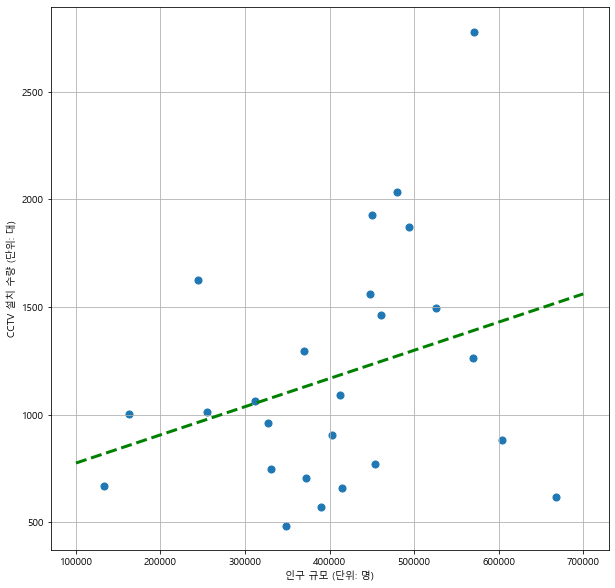

In [148]:
plt.figure(figsize=(10, 10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)  # 산점도 플롯
plt.plot(fx, fy(fx), ls='dashed', lw=3, color='g')            # 추정선 플롯
plt.xlabel('인구 규모 (단위: 명)')
plt.ylabel('CCTV 설치 수량 (단위: 대)')
plt.grid()
plt.show()

- 추정선은 인구 규모에 따른 CCTV 설치 수량의 평균적 대표값을 의미함
- 인구 규모가 300,0000 명이라면 대략 1,100 대 정도가 평균적이라는 의미

- 해당 구 이름은?
- 추정선에서 멀리 떨어진 정도를 (색깔로) 구별해준다면?

# 10. 마무리 작업
- 추정선을 기준으로 오차 계산
- marker text 출력

In [149]:
# pf = np.polyfit(data_result['인구수'],  # 추정에 사용할 x 좌표 값
#                 data_result['소계'],    # 추정에 사용할 y 좌표 값
#                 1)                     # 1차원(직선 형태) 다항식
# fy = np.poly1d()
# fx = np.linspace(100000, 700000, 100)

# 오차 = 절대값(소계 - 추정치)
data_result['오차'] = np.abs(data_result['소계'] - fy(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


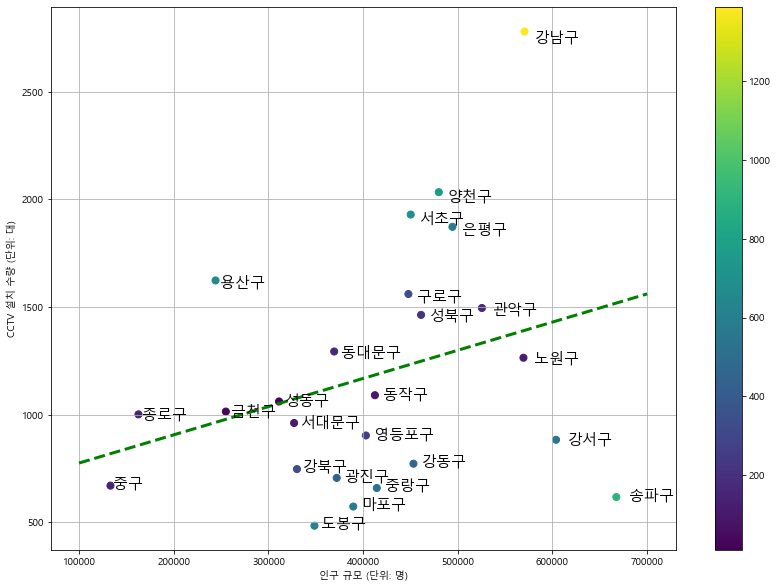

In [150]:
plt.figure(figsize=(14,10))
# 산점도 그리기
plt.scatter(df_sort['인구수'],   # x
            df_sort['소계'],     # y
            c=df_sort['오차'],   # 마커 색상 (오차 데이터를 마커 색상으로 지정)
            s=50)                   # 마커 크기 
# 추세선 그리기
plt.plot(fx, fy(fx), ls='dashed', lw=3, color='g')

# 마커 옆에 구 이름 출력
for n in range(len(df_sort)):  # 
    plt.text(df_sort['인구수'][n]*1.02,       # 텍스트 위치 x (마커 위치 x보다 약간 오른쪽)
             df_sort['소계'][n]*0.98,         # 텍스트 위치 y (마커 위치 y보다 약간 아래쪽)
             df_sort.index[n],               # 텍스트 내용 (구 이름)
             fontsize=15)                    # 폰트 크기
    
plt.xlabel('인구 규모 (단위: 명)')
plt.ylabel('CCTV 설치 수량 (단위: 대)')
plt.colorbar()                               # 색상 조견 막대 (수직 방향이 기본값)
plt.grid()
plt.show()

* 강남구, 양천구, 서초구, 은평구, 용산구는 인구 대비 CCTV 비율이 높은 지역
* 송파구, 도봉구, 강서구, 마포구, 중랑구는 인구 대비 CCTV 비율이 낮은 지역

## 도전 과제
- 지금까지 2016년 자료를 기준으로 분석한 결과
- 지금은 어떤 상황일까?
- 2016년과 2020년을 비교하면?
- 10년 동안 매해 같은 차트를 그리고, 상호작용적으로 만든다면?
- 참고 영상: 070117 'The best stats you've ever seen' by Hans Rosling

[![Hans Rosling](https://img.youtube.com/vi/hVimVzgtD6w/hqdefault.jpg)](https://youtu.be/hVimVzgtD6w?t=300)